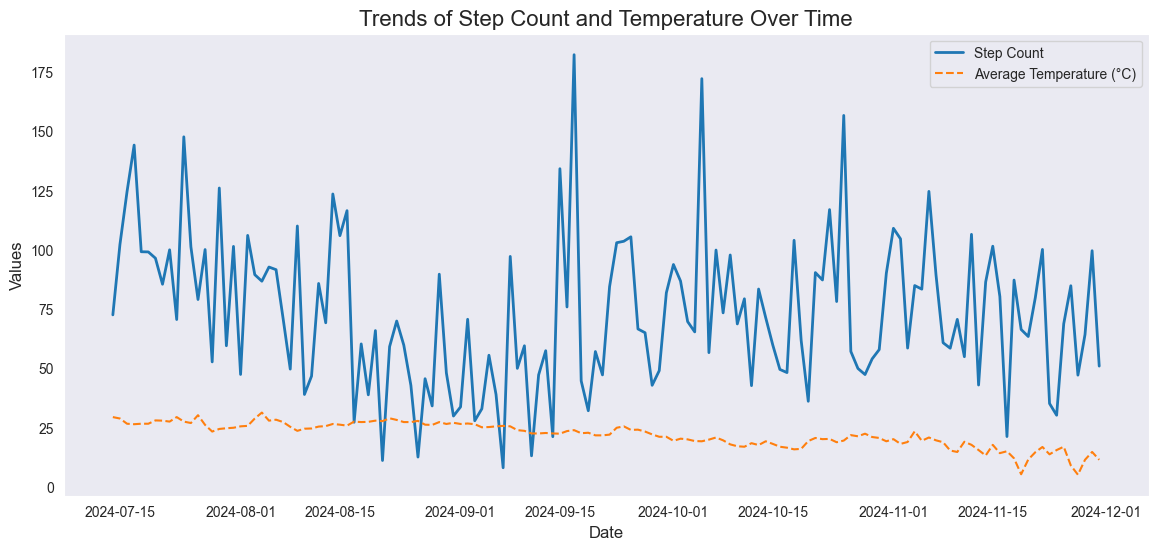

/var/folders/nk/db3vldl13lx37j2zlpf54r8h0000gn/T/ipykernel_71508/1688124399.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['tavg'], y=data['Step Count'], palette='viridis')


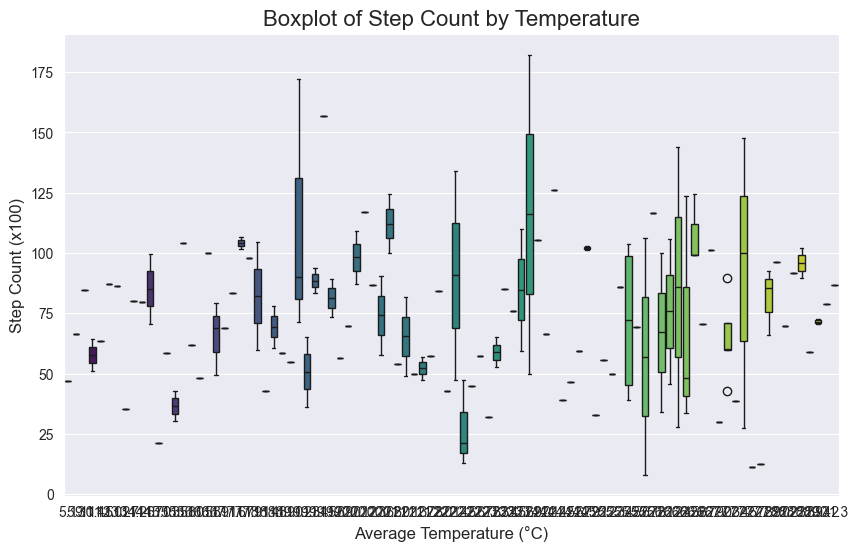

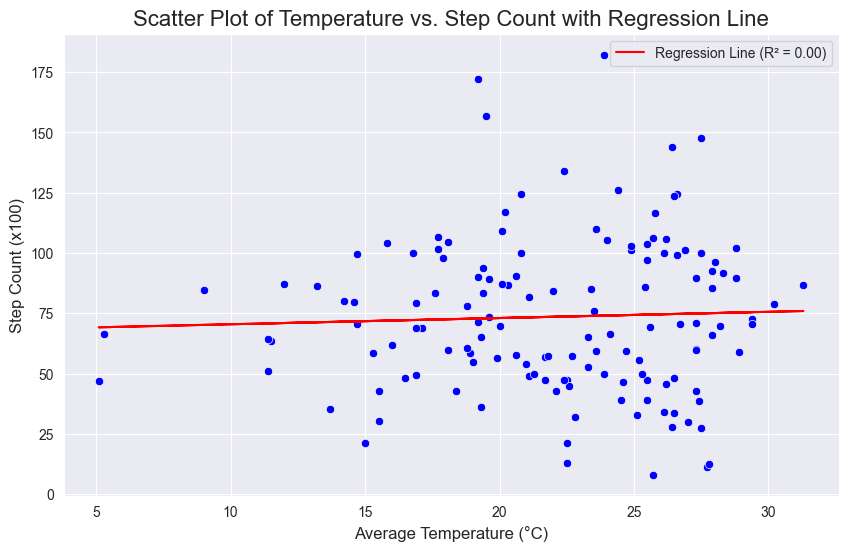

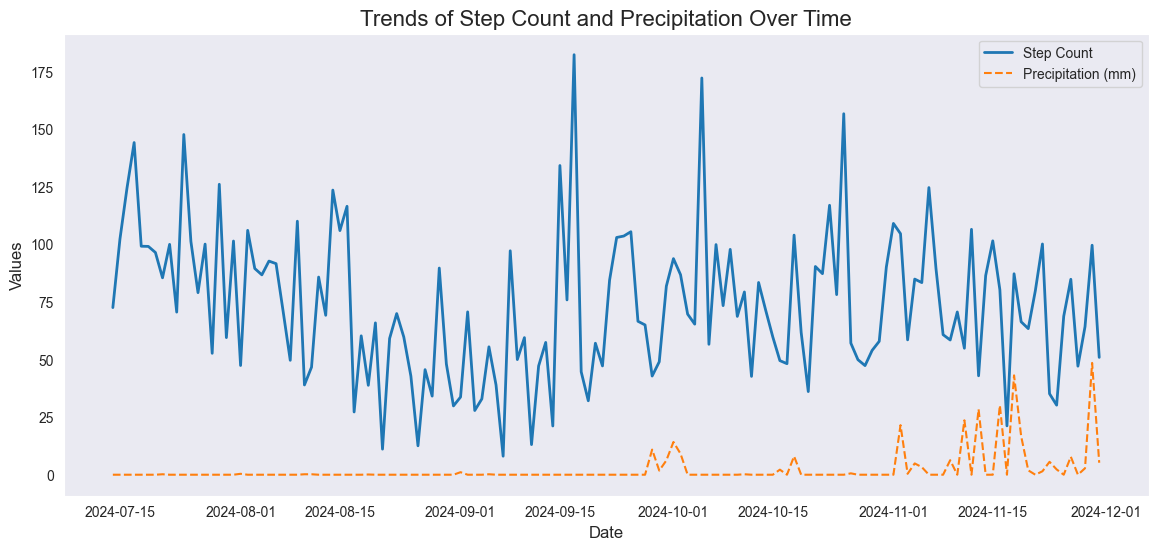

/var/folders/nk/db3vldl13lx37j2zlpf54r8h0000gn/T/ipykernel_71508/1688124399.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['prcp'], y=data['Step Count'], palette='coolwarm')


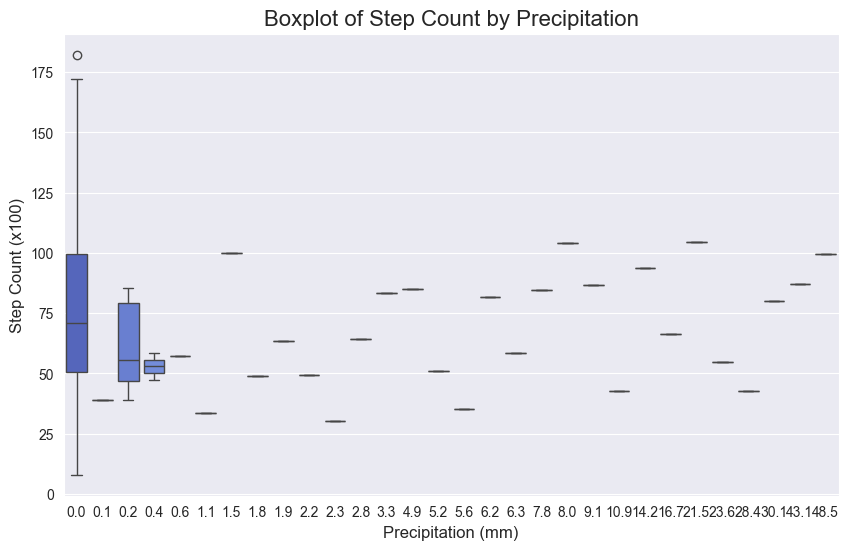

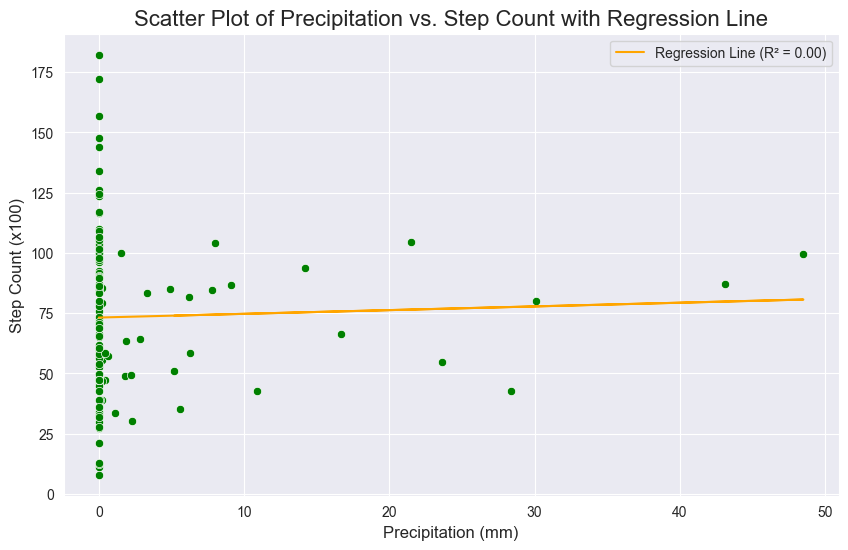

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
data = pd.read_csv("daily_data.csv")

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Adjust Step Count to be more detailed
data['Step Count'] = data['Step Count'] / 100

# Set the Date column as the index for time series analysis
data.set_index('Date', inplace=True)

# Create the outputs folder if it doesn't exist
import os
output_dir = "./"
os.makedirs(output_dir, exist_ok=True)

# Temperature-related graphs
# Trends over time plot
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Step Count'], label='Step Count', linewidth=2)
plt.plot(data.index, data['tavg'], label='Average Temperature (°C)', linestyle='--')
plt.title('Trends of Step Count and Temperature Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid()
plt.savefig(f"{output_dir}/trends_plot_temperature.png")
plt.show()

# Boxplot: Step Count vs. Temperature
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['tavg'], y=data['Step Count'], palette='viridis')
plt.title('Boxplot of Step Count by Temperature', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Step Count (x100)', fontsize=12)
plt.savefig(f"{output_dir}/boxplot_step_temperature.png")
plt.show()

# Scatter plot with regression line: Temperature vs. Step Count
plt.figure(figsize=(10, 6))
# Prepare data for regression
x = data['tavg'].values.reshape(-1, 1)
y = data['Step Count'].values
model = LinearRegression()
model.fit(x, y)
# Generate predictions
predictions = model.predict(x)
# Calculate R^2 value
r2 = model.score(x, y)
# Plot scatter and regression line
sns.scatterplot(x=data['tavg'], y=data['Step Count'], color='blue', edgecolor='w')
plt.plot(data['tavg'], predictions, color='red', label=f'Regression Line (R² = {r2:.2f})')
plt.title('Scatter Plot of Temperature vs. Step Count with Regression Line', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Step Count (x100)', fontsize=12)
plt.legend()
plt.savefig(f"{output_dir}/scatterplot_with_regression_temperature.png")
plt.show()

# Precipitation-related graphs
# Trends over time plot
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Step Count'], label='Step Count', linewidth=2)
plt.plot(data.index, data['prcp'], label='Precipitation (mm)', linestyle='--')
plt.title('Trends of Step Count and Precipitation Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid()
plt.savefig(f"{output_dir}/trends_plot_precipitation.png")
plt.show()

# Boxplot: Step Count vs. Precipitation
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['prcp'], y=data['Step Count'], palette='coolwarm')
plt.title('Boxplot of Step Count by Precipitation', fontsize=16)
plt.xlabel('Precipitation (mm)', fontsize=12)
plt.ylabel('Step Count (x100)', fontsize=12)
plt.savefig(f"{output_dir}/boxplot_step_precipitation.png")
plt.show()

# Scatter plot with regression line: Precipitation vs. Step Count
plt.figure(figsize=(10, 6))
# Prepare data for regression
x_precip = data['prcp'].values.reshape(-1, 1)
model_precip = LinearRegression()
model_precip.fit(x_precip, y)
# Generate predictions
predictions_precip = model_precip.predict(x_precip)
# Calculate R^2 value
r2_precip = model_precip.score(x_precip, y)
# Plot scatter and regression line
sns.scatterplot(x=data['prcp'], y=data['Step Count'], color='green', edgecolor='w')
plt.plot(data['prcp'], predictions_precip, color='orange', label=f'Regression Line (R² = {r2_precip:.2f})')
plt.title('Scatter Plot of Precipitation vs. Step Count with Regression Line', fontsize=16)
plt.xlabel('Precipitation (mm)', fontsize=12)
plt.ylabel('Step Count (x100)', fontsize=12)
plt.legend()
plt.savefig(f"{output_dir}/scatterplot_with_regression_precipitation.png")
plt.show()
